In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

In [2]:
# Load the pre-processed dataset
df = pd.read_csv('OnlineRetail_Clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522583 entries, 0 to 522582
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      522583 non-null  int64  
 1   StockCode      522583 non-null  object 
 2   Description    522583 non-null  object 
 3   Quantity       522583 non-null  int64  
 4   InvoiceDate    522583 non-null  object 
 5   UnitPrice      522583 non-null  float64
 6   CustomerID     522583 non-null  object 
 7   Country        522583 non-null  object 
 8   Invoice_Date   522583 non-null  object 
 9   Hour           522583 non-null  int64  
 10  DayofWeek      522583 non-null  object 
 11  MonthFirstDay  522583 non-null  object 
 12  TotalPrice     522583 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 51.8+ MB


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Hour,DayofWeek,MonthFirstDay,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,2010-12-01,20.34


## 1. Cohort Analysis

### Assign Acquisition Month Cohort

In [4]:
# Convert object to dtype datetime
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'], format='%Y-%m-%d').dt.date
df.drop(['MonthFirstDay'], axis=1, inplace=True)

# Define a function that will parse the date
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df['InvoiceMonth'] = df['Invoice_Date'].apply(get_month)

grouping = df.groupby(['CustomerID']).InvoiceMonth
grouping


In [5]:
df['CohortMonth'] = grouping.transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Hour,DayofWeek,TotalPrice,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8,Wednesday,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,8,Wednesday,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,20.34,2010-12-01,2010-12-01


### Extract Integer Values from Data

In [6]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

### Assign Time Offset Values

In [7]:
invoice_year, invoice_month, _  = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['CohortIndex'] = years_diff * 12 + months_diff + 1 # So that CohortIndex starts from 1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Hour,DayofWeek,TotalPrice,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,8,Wednesday,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,8,Wednesday,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,8,Wednesday,20.34,2010-12-01,2010-12-01,1


### Count Monthly Active Customer from Each Cohort

In [8]:
cohort_df = df.groupby(['CohortMonth', 'CohortIndex']).CustomerID.nunique().reset_index()
cohort_df.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,878
1,2010-12-01,2,322
2,2010-12-01,3,284
3,2010-12-01,4,335
4,2010-12-01,5,319


In [9]:
cohort_counts = cohort_df.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,878.0,322.0,284.0,335.0,319.0,351.0,319.0,305.0,307.0,348.0,330.0,443.0,234.0
2011-01-01,411.0,92.0,112.0,94.0,134.0,120.0,103.0,102.0,125.0,136.0,151.0,48.0,NaN
2011-02-01,376.0,69.0,70.0,104.0,100.0,91.0,94.0,101.0,92.0,115.0,25.0,NaN,NaN
2011-03-01,452.0,66.0,113.0,90.0,102.0,75.0,119.0,104.0,125.0,38.0,NaN,NaN,NaN
2011-04-01,299.0,63.0,61.0,63.0,59.0,68.0,65.0,77.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,54.0,49.0,49.0,59.0,65.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,241.0,42.0,38.0,64.0,54.0,79.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,40.0,42.0,50.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,172.0,34.0,43.0,41.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Retention Rate

In [10]:
# No. of customer in the first column is the cohort size
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size, axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.7,32.3,38.2,36.3,40.0,36.3,34.7,35.0,39.6,37.6,50.5,26.7
2011-01-01,100.0,22.4,27.3,22.9,32.6,29.2,25.1,24.8,30.4,33.1,36.7,11.7,NaN
2011-02-01,100.0,18.4,18.6,27.7,26.6,24.2,25.0,26.9,24.5,30.6,6.6,NaN,NaN
2011-03-01,100.0,14.6,25.0,19.9,22.6,16.6,26.3,23.0,27.7,8.4,NaN,NaN,NaN
2011-04-01,100.0,21.1,20.4,21.1,19.7,22.7,21.7,25.8,7.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.4,17.6,17.6,21.1,23.3,26.9,9.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.8,26.6,22.4,32.8,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,21.3,22.3,26.6,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,19.8,25.0,23.8,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualizing Cohort Analysis

In [11]:
# Set the index of retention to a more readable string format.
retention.index = retention.index.strftime('%Y-%m')

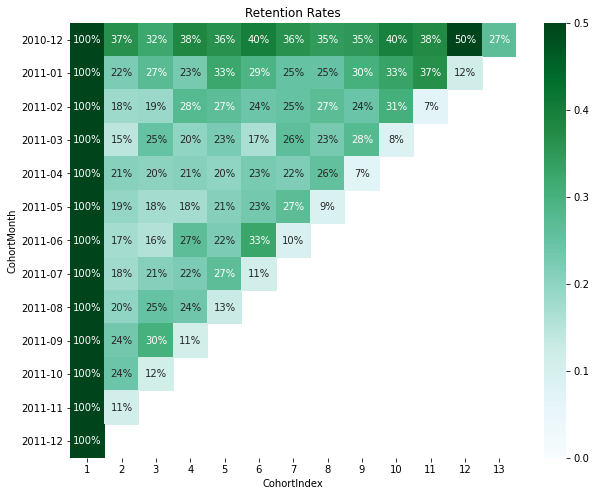

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='BuGn')
plt.title('Retention Rates')
plt.show()

## 2. Recency, Frequency and Monetary Value Analysis

### Calculate RFM Metrics

In [13]:
# Create a hypothethical snapshot_date as if we're doing the analysis recently
snapshot_date = max(df.Invoice_Date) + timedelta(days=1)
df_customer = df.groupby('CustomerID').agg({'Invoice_Date': lambda x: (snapshot_date - x.max()).days,
                                           'InvoiceNo':'count',
                                           'TotalPrice':'sum'})
# Rename the columns
df_customer.rename(columns={'Invoice_Date': 'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'MonetaryValue'}, inplace=True)
df_customer.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,72,1457.55
12350.0,311,17,334.40
12352.0,37,82,1665.74


### Building RFM Segments

In [15]:
r_labels = range(4,0,-1) # A higher Recency means longer inactive days
f_labels = range(1,5) 
m_labels = range(1,5)

r_quartiles = pd.qcut(df_customer['Recency'], 4, labels = r_labels)
f_quartiles = pd.qcut(df_customer['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(df_customer['MonetaryValue'], 4, labels = m_labels)

df_customer = df_customer.assign(R=r_quartiles.values)
df_customer = df_customer.assign(F=f_quartiles.values)
df_customer = df_customer.assign(M=m_quartiles.values)

# Concatenate RFM quartile values to RFM_Segment
def rfm_join(x):
    return '{}{}{}'.format(x['R'], x['F'], x['M'])              

df_customer['RFM_Segment'] = df_customer.apply(rfm_join, axis=1)

# Sum RFM quartile values to RFM_Score
df_customer['RFM_Score'] = df_customer[['R', 'F', 'M']].sum(axis=1)

df_customer.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,3,182,4310.00,4,4,4,444,12
12348.0,76,31,1797.24,2,2,4,224,8
12349.0,19,72,1457.55,3,3,3,333,9
12350.0,311,17,334.40,1,1,2,112,4
12352.0,37,82,1665.74,3,3,4,334,10


### Analyzing RFM Segments & RFM Scores

In [16]:
# 10 Largest RFM Segments
df_customer.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    444
111    388
344    220
122    209
211    182
233    170
222    169
333    167
433    143
311    125
dtype: int64

In [17]:
# No. of customer in each RFM score group
df_customer['RFM_Score'].value_counts().sort_index(ascending=False)

12    444
11    393
10    425
9     404
8     466
7     439
6     454
5     517
4     381
3     388
Name: RFM_Score, dtype: int64

### Grouping into Named Segments 

In [18]:
# The RFM Segment gives 4^3= 64 segments. Group them into 8 segments based on the R and F scores.
segments = {
    '[1-2][1-2]': 'Hibernating',     # Last purchase was long time ago; low number of orders
    '[1-2][3-4]': 'At risk',         # Last purchase was long time ago; high number of orders
    '3[1-2]': 'About To Sleep',      # Made recent purchase; low number of orders
    '33': 'Need Attention',          # Above average recent purchase and number of orders
    '[3-4]1': 'New',                 # New customer
    '4[2-3]': 'Potential Loyalists', # Made recent purchase; moderate number of orders
    '[3-4]4': 'Loyal',               # Made recent purchase; high number of orders
    '44': 'Super Loyal'              # Awesome!
}

df_customer['Segment'] = df_customer['R'].astype(str) + df_customer['F'].astype(str)
df_customer['Segment'] = df_customer['Segment'].replace(segments, regex=True)
df_customer.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12347.0,3,182,4310.00,4,4,4,444,12,Loyal
12348.0,76,31,1797.24,2,2,4,224,8,Hibernating
12349.0,19,72,1457.55,3,3,3,333,9,Need Attention
12350.0,311,17,334.40,1,1,2,112,4,Hibernating
12352.0,37,82,1665.74,3,3,4,334,10,Need Attention


In [19]:
def rfm_level(df):
    if df['RFM_Score']>9:
        return 'High Value'
    elif df['RFM_Score']>=6 and df['RFM_Score']<10:
        return 'Mid Value'
    else:
        return 'Low Value'
    
df_customer['RFM_Level'] = df_customer.apply(rfm_level, axis=1)
df_level = df_customer.groupby('RFM_Level').agg({'Recency':'mean', 'Frequency':'mean', 'MonetaryValue':['mean', 'count']})\
           .round(1).reset_index()

# Sort RFMLevel column in this order: High Value, Mid Value, Low Value
level_categories = ['High Value', 'Mid Value', 'Low Value']
df_level['RFM_Level'] = pd.Categorical(df_level['RFM_Level'], categories = level_categories)
df_level.sort_values(by = 'RFM_Level', inplace=True)
df_level

RFM_Level Recency Frequency MonetaryValue      
                 mean      mean          mean count
0  High Value    20.8     329.4        5797.0  1262
2   Mid Value    72.5      49.7         843.1  1763
1   Low Value   192.6      15.0         258.8  1286

In [20]:
df_customer.head(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segment,RFM_Level
CustomerID,,,,,,,,,,
12347.0,3,182,4310.00,4,4,4,444,12,Loyal,High Value
12348.0,76,31,1797.24,2,2,4,224,8,Hibernating,Mid Value
12349.0,19,72,1457.55,3,3,3,333,9,Need Attention,Mid Value
12350.0,311,17,334.40,1,1,2,112,4,Hibernating,Low Value
12352.0,37,82,1665.74,3,3,4,334,10,Need Attention,High Value
12353.0,205,4,89.00,1,1,1,111,3,Hibernating,Low Value
12354.0,233,58,1079.40,1,3,3,133,7,At risk,Mid Value
12355.0,215,13,459.40,1,1,2,112,4,Hibernating,Low Value
12356.0,23,59,2811.43,3,3,4,334,10,Need Attention,High Value


## 3. Data Pre-Processing for Clustering

### Managing skewed variables

In [21]:
df_customer.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4311.000000,4311.000000,4.311000e+03,4311.000000
mean,93.155184,121.220830,2.118998e+03,7.500580
std,100.082413,2012.991932,2.316329e+04,2.824066
min,1.000000,1.000000,2.900000e+00,3.000000
25%,18.000000,17.000000,3.004700e+02,5.000000
50%,51.000000,41.000000,6.557500e+02,7.000000
75%,143.000000,98.000000,1.608940e+03,10.000000
max,374.000000,131428.000000,1.463393e+06,12.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

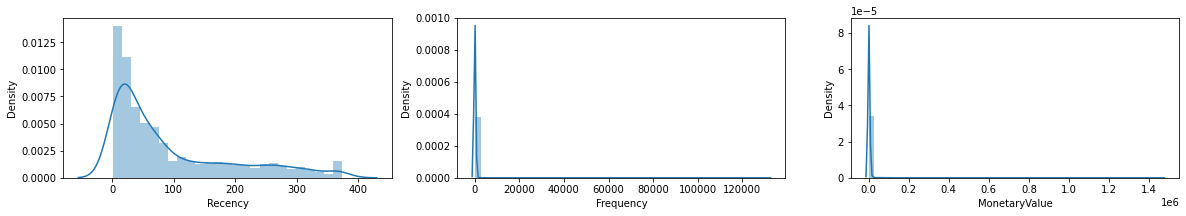

In [22]:
# Explore distribution of each Recency, Frequency and MonentaryValue
plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1)
sns.distplot(df_customer['Recency'])

plt.subplot(3, 3, 2)
sns.distplot(df_customer['Frequency'])

plt.subplot(3, 3, 3)
sns.distplot(df_customer['MonetaryValue'])

All three distributions are highly skewed

In [23]:
# Create a df containing only Recency, Frequency and MonetaryValue
df_rfm = df_customer[[ 'Recency', 'Frequency', 'MonetaryValue']]

# Apply logarithmic transformation to unskew the data
df_log = np.log(df_rfm)

### Centering and Scaling Variables (Standardization)

In [24]:
from sklearn.preprocessing import StandardScaler
# Initialize a scaler
scaler = StandardScaler()
# Fit the scaler
scaler.fit(df_log)
normalized = scaler.transform(df_log)
df_normalized = pd.DataFrame(normalized, index=df_log.index, columns=df_log.columns)
df_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,4311.00,4311.00,4311.00
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-2.75,-2.81,-4.37
25%,-0.66,-0.65,-0.67
50%,0.09,0.02,-0.05
75%,0.84,0.69,0.66
max,1.53,6.17,6.10


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

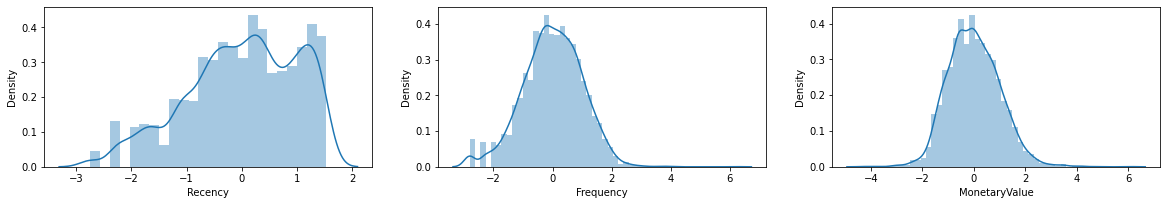

In [25]:
# Visualize the normalized variables
plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1); sns.distplot(df_normalized['Recency'])
plt.subplot(3, 3, 2); sns.distplot(df_normalized['Frequency'])
plt.subplot(3, 3, 3); sns.distplot(df_normalized['MonetaryValue'])

## 4. Customer Segmentation with K-Means

### Choosing the Number of Cluster - The Elbow Method

<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='No. of Clusters (k)', ylabel='SSE'>

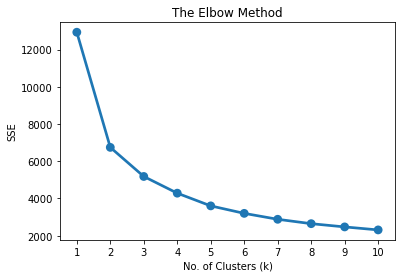

In [26]:
from sklearn.cluster import KMeans
# Initialize an empty dict sse(sum of squared errors)
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_normalized)
    sse[k] = kmeans.inertia_

# Plot sum of squared errors
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

### Running K-Means on Pre-Processed Data & Analyzing Average RFM Values of Each Cluster

In [27]:
# Try k = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1)
# Fit k-means clustering on the normalized data set
kmeans.fit(df_normalized)
# Extract cluster labels
cluster_labels = kmeans.labels_

In [28]:
# Create a df by adding a new cluster label colum
df_k3 = df_rfm.assign(Cluster=cluster_labels)
df_k3.groupby('Cluster').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         176.1      14.9         271.5  1473
1          14.8     394.4        7051.8   972
2          68.5      62.9        1007.8  1866

In [29]:
# Try k = 4

kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(df_normalized)
cluster_labels = kmeans.labels_
df_k4 = df_rfm.assign(Cluster=cluster_labels)
df_k4.groupby('Cluster').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         102.4      76.7        1289.4  1244
1         183.1      14.3         264.5  1337
2          20.1      40.8         585.1   862
3          13.9     429.5        7687.8   868

In [30]:
# Try k = 5

kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(df_normalized)
cluster_labels = kmeans.labels_
df_k5 = df_rfm.assign(Cluster=cluster_labels)
df_k5.groupby('Cluster').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          62.2     108.9        1861.0  1012
1         173.5       7.1         175.0   682
2          18.1      40.1         579.3   770
3           9.6     512.2        9156.6   665
4         169.2      30.5         505.1  1182

Hence, choose k = 4

## Interpreting Segments

In [31]:
# Prepare data for a snake plot
df_normalized['Cluster'] = df_k4['Cluster']

# Melt the data
df_melt = pd.melt(df_normalized.reset_index(),
                id_vars=['CustomerID', 'Cluster'],
                value_vars = ['Recency', 'Frequency', 'MonetaryValue'],
                var_name = 'Attribute',
                value_name = 'Value')

In [32]:
df_melt

,CustomerID,Cluster,Attribute,Value
0,12347.0,3,Recency,-1.953623
1,12348.0,0,Recency,0.382200
2,12349.0,0,Recency,-0.619662
3,12350.0,1,Recency,1.400513
4,12352.0,0,Recency,-0.138004
...,...,...,...,...
12928,18281.0,1,MonetaryValue,-1.719958
12929,18282.0,2,MonetaryValue,-1.090271
12930,18283.0,3,MonetaryValue,0.856054
12931,18287.0,0,MonetaryValue,0.770455


<AxesSubplot:title={'center':'Snake Plot of Standardize Variables'}, xlabel='Attribute', ylabel='Value'>

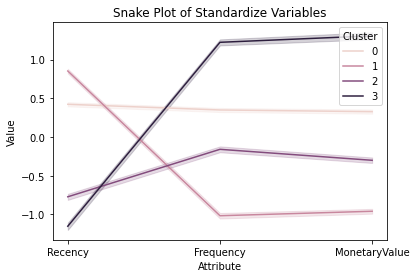

In [33]:
plt.title('Snake Plot of Standardize Variables')
sns.lineplot(data=df_melt, x='Attribute', y='Value', hue='Cluster')

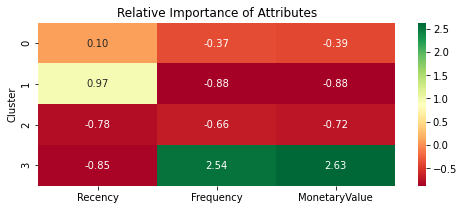

In [34]:
# Calculate relative importance of each attribute within each cluster
cluster_avg = df_k4.groupby(['Cluster']).mean()
population_avg = df_rfm.mean()
relative_imp = cluster_avg/population_avg - 1 # So that 0 is returned when cluster_avg = population_avg

# PLot relative importance heatmap
plt.figure(figsize=(8,3))
plt.title('Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

The further a ratio is from 0, the more important that attribute is for a segment relative to the total population.

Based on the visualization above, it can be concluded that Cluster 3 is the most active group of customers with low Recency (last purchase was made recently), high Frequency (high number of orders) and high MonetaryValue (high revenue). The reverse applies to Cluster 0.